- By: Alex Kwon
- Email: alex.kwon [at] hudsonthames [dot] org

# Data Selection for Online Portfolio Selection

## OLPS Strategies

[**Benchmarks**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Introduction%20to%20Online%20Portfolio%20Selection.ipynb)

[**Momentum**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Momentum.ipynb)

[**Mean Reversion**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Mean%20Reversion.ipynb)

[**Pattern Matching**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Pattern%20Matching.ipynb)

## Abstract

Data selection is one of the hardest problems in research. With numerous test sets and a vast amount of resources available to the public, it is tempting to overfit and choose the data that best represent your hypothesis. However, conclusions that are reached from these weak models are more prone to outliers and can have a narrow scope for applications. Online portfolio selection also deals with the same issues as it is heavily dependent on the data available.

Traditional papers for online portfolio selection have consistently used the same datasets and developed their arguments to improve on the performance of the prior papers. Thomas Cover first used a NYSE dataset that contained 36 stocks from 1962 to 1984. Allan Borodin collected three datasets: 88 stocks from the Toronto Stock Exchange from 1994 to 1998, the largest 25 stocks by market capitalization on S&P500 from 1998 to 2003, and 30 stocks from DJIA from 2001 to 2003. Bin Li and Steven Hoi introduced the MSCI World Index from 2006 to 2010 to add an additional perspective to the problem.

All of these datasets have different characteristics as Cover’s NYSE dataset all increased in value whereas most assets in DJIA lost value. The S&P 500 data contains both a bull and bear market environment, and the stocks from TSE originate from a less liquid market and a long bear run. However, these mediations do not seem enough to justify the applications and practicality of the newest module.

To offset these older datasets in my research, I’ll expand the MSCI world index to look back from 1993 to 2020 and also include 44 largest US stocks by market capitalization from 2011 to 2020. Through a different lens of selection, I hope to introduce the readers to a more practical and familiar set of stocks to understand the module in a more intuitive way.

## Import Data

We will be using 6 different datasets for the exploration part of this module.
1. 36 NYSE Stocks from 1962 to 1984 by Cover
2. 30 DJIA Stocks from 2001 to 2003 by Borodin
3. 88 TSE Stocks from 1994 to 1998 by Borodin
4. 25 Largest S&P500 Stocks from 1998 to 2003 by Borodin
5. 23 MSCI Developed Market Indices from 1993 to 2020 by Alex Kwon
6. 44 Largest US Stocks by from 2011 to 2020 by Alex Kwon

### Dataset 1: NYSE 1962-1984

Dataset #1 to #4 was downloaded from a previous researcher's [portfolio](http://www.cs.technion.ac.il/~rani/portfolios/).

This is the original NYSE data that Thomas Cover used for his papers. Although it covers a lot of sectors and should have been useful when the paper was published, it is difficult to gauge if this dataset adds much value now because of the time difference.

Strategies that worked a year ago could quickly lose their value as the paradigm shifts. This data is collected almost 60 years ago, and markets nowadays have many complex movements that cannot be comprehended with data from a long time ago. Results from this data should be approached with a grain of salt.

In [1]:
import pandas as pd

In [22]:
# Read txt
nyse = pd.read_csv('NYSE.txt', sep="  ", header=None)
# Get index.
nyse.index = yf.download('AA', start='1962-07-03', end='1985-01-01')['Adj Close'].index
# Change column name.
nyse = nyse.rename(columns={
    0: 'AHP', 1: 'Alcoa', 2: 'American Brands', 3: 'ARCO', 4: 'Coca Cola',\
    5: 'Commercial Metals', 6: 'Dow Chemical', 7: 'DuPont', 8: 'Espey Manufacturing',\
    9: 'Exxon', 10: 'Fischbach', 11: 'Ford', 12: 'General Electric', 13: 'GM',\
    14: 'GT&E', 15 : 'Gulf Oil', 16: 'Hewlett-Packard', 17: 'IBM', 18: 'Ingersoll Rand',\
    19: 'Iroquois Brands', 20: 'Johnson & Johnson', 21: 'Kimberly Clark', 22: 'Kinark',\
    23: 'Eastman Kodak', 24: 'Lukens Steel', 25: 'MEI', 26: 'Merck', 27: '3M', 28: 'Mobil',\
    29: 'Philip Morris', 30: 'P&G', 31: 'Pillsbury', 32: 'Schlumberger', 33: 'Sears',\
    34: 'Sherwin Williams', 35: 'Texaco'})

# Data is preprocessed to show the price relative, so we will take the cumulative product to indicate relative price.
nyse = nyse.cumprod()

# Export to csv.
nyse.to_csv('NYSE.csv')

In [12]:
nyse.head()

,AHP,Alcoa,American Brands,ARCO,Coca Cola,Commercial Metals,Dow Chemical,DuPont,Espey Manufacturing,Exxon,...,Merck,3M,Mobil,Philip Morris,P&G,Pillsbury,Schlumberger,Sears,Sherwin Williams,Texaco
Date,,,,,,,,,,,,,,,,,,,,,
1962-07-03,1.015150,1.027650,1.041830,1.020830,1.006370,1.049380,1.008470,1.019830,1.054260,0.997510,...,1.031480,1.033770,1.010180,1.014950,1.007750,1.005260,1.011760,1.005780,0.996970,0.997520
1962-07-05,1.030306,1.069126,1.030422,1.015624,1.011150,0.999996,1.016941,1.028325,1.100774,1.002498,...,1.040743,1.036365,1.022898,1.014950,1.009685,1.005260,1.031368,1.015415,0.987878,0.999994
1962-07-06,1.030306,1.043777,1.007608,1.013024,0.996822,0.987646,1.014114,1.022659,1.069765,1.002498,...,1.020375,0.994807,1.020351,0.986714,0.996115,0.989467,1.003913,1.015415,1.015153,0.997514
1962-07-09,1.055559,1.050687,1.034229,1.015627,1.015931,0.987646,1.008465,1.029746,1.069765,1.002498,...,1.031487,1.031167,1.033075,0.983389,1.003864,1.005259,1.003913,1.017345,1.018188,1.019788
1962-07-10,1.088281,1.034559,1.038035,1.020837,1.019111,1.037029,1.036713,1.033999,1.131779,1.019951,...,1.042596,1.025970,1.027982,0.970103,1.015489,1.002625,1.019604,1.032757,1.030305,1.029690


### Dataset 2: DJIA 2001-2003

This is a more recent dataset that involves companies that are still well known to us. 2001 to 2003 covers a bear market run that should be useful to see how our strategies are affected in times of general downturn. Most of these assets lost in value as seen with the last row displaying values that are below 1.

In [20]:
# Read txt.
djia = pd.read_csv('DJIA.txt', sep="  ", header=None)

# Get index.
djia.index = yf.download('AA', start='2001-01-04', end='2003-01-15')['Adj Close'].index

# Change column names.
djia = djia.rename(columns={
    0: 'Alcoa', 1: 'GE', 2: 'Johnson&Johnson', 3: 'Microsoft',\
    4:'American Express', 5: 'General Motors', 6: 'JP Morgan Chase', 7: 'P&G', 8: 'Boeing',\
    9: 'Home Depot', 10: 'Coca Cola', 11: 'SBC Comms', 12: 'Citigroup',\
    13: 'Honeywell', 14: 'McDonads', 15 : 'AT&T', 16: 'Caterpillar', 17: 'Hewlett-Packard',\
    18: '3M', 19: 'United Technologies', 20: 'DuPont', 21: 'IBM', 22: 'Philip Morris',\
    23: 'Walmart', 24: 'Walt Disney', 25: 'Intel', 26: 'Merck', 27: 'ExxonMobil',\
    28: 'Eastman Kodak', 29: 'International Paper'})

# Data is preprocessed to show the price relative, so we will take the cumulative product to indicate relative price.
djia = djia.cumprod()

# Export to csv.
djia.to_csv('DJIA.csv')

In [9]:
djia.head()

,Alcoa,GE,Johnson&Johnson,Microsoft,American Express,General Motors,JP Morgan Chase,P&G,Boeing,Home Depot,...,DuPont,IBM,Philip Morris,Walmart,Walt Disney,Intel,Merck,ExxonMobil,Eastman Kodak,International Paper
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-04,1.032426,1.005229,0.978534,1.010430,0.968716,1.042328,1.027059,0.968913,0.975064,1.004860,...,1.027326,0.984783,0.958580,0.961499,1.028332,0.987438,0.953663,0.972085,1.078765,1.038237
2001-01-05,1.013460,0.989542,0.991089,1.024823,0.921702,0.985222,0.966621,1.004154,0.939098,0.967146,...,1.000000,0.993342,0.949822,0.922998,1.014166,0.936605,0.934702,0.976542,1.037037,1.010716
2001-01-08,1.028755,0.952939,0.989874,1.020859,0.874866,0.958949,0.972743,1.025861,0.943095,0.927099,...,1.007718,0.988693,0.995503,0.922998,0.970058,0.933100,0.936834,0.972085,1.003210,0.974184
2001-01-09,0.990517,0.933487,0.996760,1.080726,0.839113,0.988688,0.961683,1.000000,0.942136,0.891913,...,0.968711,0.978125,1.026746,0.902635,0.970058,0.942156,0.942444,0.961764,1.027901,0.933025
2001-01-10,1.001835,0.934742,0.970838,1.103045,0.834644,0.962416,1.006123,0.989012,0.965153,0.922239,...,0.977889,0.987425,1.044497,0.884497,0.978107,0.964067,0.933356,0.950035,1.024691,0.928641


### Dataset 3: TSE 1994-1998

The Toronto Stock Exchange data includes a collection that may be unfamiliar to most researchers. It is an interesting universe with half of the stocks decreasing in value. With a combination of both overperforming and underperforming stocks, selection strategies will need to identify the ups and downs to have profitable returns.

In [24]:
# Read txt.
tse = pd.read_csv('TSE.txt', sep="  ", header=None)

# Get index.
tse.index = yf.download('TRP', start='1994-01-07', end='1999-01-01')['Adj Close'].index

# Change column name.
tse = tse.rename(columns={
    0: 'Westcoast Energy', 1: 'Seagram', 2: 'TVX Gold', 3: 'Transcanada', 4: 'Thomson',\
    5: 'Talisman', 6: 'Trilon', 7: 'Teck', 8: 'TD Bank', 9: 'Transalta',\
    10: 'Telus', 11: 'Suncor', 12: 'Southam', 13: 'Stelco', 14: 'Shell Canada',\
    15: 'Slocan Forest', 16: 'RBC', 17: 'Repap Enterprise', 18: 'Rio Algom', 19: 'Ranger Oil',\
    20: 'Renaissance Energy', 21: 'Rogers Comms', 22: 'QLT', 23: 'Pure Gold Minerals',\
    24: 'Power Corp', 25 :'Potash', 26 :'Poco Petroleum', 27 :'Placer Dome',\
    28: 'Petro-Canada', 29 :'Northern Telecom', 30 :'Nova Scotia', 31:'Newbridge Networks',\
    32: 'Nova Corp', 33: 'National Bank of Canada', 34: 'Inco', 35: 'Methanex', 36: 'Molson',\
    37: 'Mitel Corp', 38: 'Merrill Lynch', 39: 'Magna Int', 40: 'Moore Corp',\
    41: 'Macmillan Bloedel', 42: 'Miramar Mining Corp', 43: 'Loewen Group', 44: 'Kinross Gold',\
    45: 'Imasco', 46: 'Imperial Oil', 47: 'Investors Group', 48: 'Intl Forest Products',\
    49: 'Hudson\'s Bay', 50: 'Gentra', 51: 'Gulf Canada', 52: 'Franco-Nevada Mining Corp',\
    53: 'Fletcher Challenge Canada', 54: 'First Australia', 55: 'Extendicare',\
    56: 'Euro-Nevada Mining Corp', 57: 'Canadian 88 Energy Corp', 58: 'Echo Bay Mines',\
    59: 'Domtar', 60: 'Dofasco', 61: 'Dundee Bancorp', 62: 'Canadian Occidental Petroleum',\
    63: 'Canadian Utilities', 64: 'Canadian Tire', 65: 'Canadian Natural Resources',\
    66: 'Canadian Imperial Bank of Commerce', 67: 'Cominco', 68: 'Cambior', 69: 'CAE',\
    70: 'Breakwater Resources', 71: 'Bank of Nova Scotia', 72: 'Bank of Montreal',\
    73: 'BEMA Gold Corp', 74: 'BCE Mobile Comms', 75: 'BC Telecom', 76: 'B.C. Gas', 77: 'BCE',\
    78: 'Cott Corp', 79: 'Bombardier', 80: 'Anderson', 81: 'AUR Resources',\
    82: 'Alcan Aluminum', 83: 'Agnico-Eagle Mines', 84: 'Alberta Energy', 85: 'Air Canada',\
    86: 'Aber Resources', 87: 'Barrick Gold Corp'})

# Data is preprocessed to show the price relative, so we will take the cumulative product to indicate relative price.
tse = tse.cumprod()

# Export to csv.
tse.to_csv('TSE.csv')

In [8]:
tse.head()

,Westcoast Energy,Seagram,TVX Gold,Transcanada,Thomson,Talisman,Trilon,Teck,TD Bank,Transalta,...,Cott Corp,Bombardier,Anderson,AUR Resources,Alcan Aluminum,Agnico-Eagle Mines,Alberta Energy,Air Canada,Aber Resources,Barrick Gold Corp
Date,,,,,,,,,,,,,,,,,,,,,
1994-01-07,0.977273,1.010790,1.057140,0.981366,1.000000,1.004310,1.014290,1.021510,1.000000,0.991803,...,0.992308,0.988095,1.008660,1.000000,1.018100,1.028990,0.993243,1.025000,1.105260,1.063120
1994-01-10,0.988639,1.035969,1.028569,0.981366,0.992308,1.051723,1.028571,1.037640,0.994152,0.991803,...,1.084612,0.988095,1.038960,1.043480,1.040722,1.050733,0.986486,1.000000,1.144729,1.066448
1994-01-11,0.988639,1.053953,1.028569,0.981366,0.992308,1.043102,1.042858,1.037640,0.999998,0.983607,...,1.023074,0.988095,1.064934,1.065216,1.058820,1.043486,0.993243,1.050000,1.184199,1.066448
1994-01-12,0.982957,1.057547,1.042855,0.968944,0.999998,1.047411,1.114283,1.043015,0.999998,0.991800,...,1.015381,1.011908,1.073592,1.108698,1.054295,1.000007,1.020270,1.100001,1.144726,1.029903
1994-01-13,0.988638,1.093514,1.014284,0.981366,1.007688,1.043100,1.128569,1.026885,1.017538,0.983604,...,0.980766,1.020388,1.090909,1.108698,1.072397,1.000007,1.013513,1.150007,1.131569,1.023258


### Dataset 4: SP500 1998-2003

This dataset also includes the bear and bull run during turbulent times. It is longer than the DJIA data by 3 more years and includes many companies that are familiar to us. This will be a good comparison to our new dataset #6 which looks at more recent history for most of these companies.

In [26]:
# Read txt.
sp500 = pd.read_csv('SP500.txt', sep="  ", header=None)

# Get index.
sp500.index = yf.download('GE', start='1998-01-03', end='2003-02-01')['Adj Close'].index

# Change column name.
sp500 = sp500.rename(columns={
      0: 'GE', 1: 'Microsoft', 2: 'Walmart', 3: 'ExxonMobil', 4: 'Pfizer',\
      5: 'Citigroup', 6: 'Johnson & Johnson', 7: 'AIG', 8: 'IBM',\
      9: 'Merck', 10: 'P&G', 11: 'Intel', 12: 'Bank of America', 13: 'Coca Cola',\
      14: 'Cisco', 15 : 'Verizon', 16: 'Wells Fargo', 17: 'Amgen', 18: 'Dell',\
      19: 'PepsiCo', 20: 'SBC Comms', 21: 'Fannie Mae', 22: 'Chevron',\
      23: 'Viacom', 24: 'Eli Lilly'})

# Data is preprocessed to show the price relative, so we will take the cumulative product to indicate relative price.
sp500 = sp500.cumprod()

# Export to csv.
sp500.to_csv('SP500.csv')

In [11]:
sp500.head()

,GE,Microsoft,Walmart,ExxonMobil,Pfizer,Citigroup,Johnson & Johnson,AIG,IBM,Merck,...,Verizon,Wells Fargo,Amgen,Dell,PepsiCo,SBC Comms,Fannie Mae,Chevron,Viacom,Eli Lilly
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-05,1.017737,0.994283,1.009524,0.988891,1.054500,0.992991,0.999038,0.993189,1.007693,1.005807,...,0.969759,0.990180,0.996522,1.029154,1.013889,0.971643,0.998926,0.971131,1.033182,1.043518
1998-01-06,1.004220,1.000000,1.015873,0.953535,1.020643,0.997664,0.983668,0.989215,0.996450,0.991870,...,0.993127,0.980360,0.984938,1.031337,0.977431,0.967472,1.018260,0.946271,1.034688,1.025385
1998-01-07,1.012669,0.988085,1.012698,0.983838,1.032205,0.964950,0.993274,0.979569,0.986982,0.976771,...,0.973195,0.963993,0.986095,1.005831,0.996528,0.973311,1.020408,0.979952,1.060332,1.005440
1998-01-08,1.003377,0.995235,0.998415,0.962628,1.025597,0.939250,1.004801,0.974461,0.986392,0.986644,...,0.959449,0.980360,0.989573,1.005094,0.996528,0.964136,1.009667,0.943063,1.045249,0.993654
1998-01-09,0.978882,0.968543,0.969844,0.939394,0.976876,0.891352,0.993274,0.937003,0.947338,0.955865,...,0.951890,0.934534,0.975668,0.970109,0.965278,0.954963,0.978518,0.912590,0.983406,0.966455


### Dataset 5: MSCI 1993-2020

Unfortunately, I am unable to directly share the data that I downloaded from Factset. However, MSCI monthly data is available to down at their [website](https://www.msci.com/end-of-day-data-country).

I used MSCI Developed Markets Index from 1993/01/01.

It includes 23 countries:
   - Americas: USA, Canada
   - Europe & Middle East: Austria, Belgium, Denmark, Finland, France, Germany, Ireland, Israel, Italy, Netherlands, Norway, Portugal, Spain, Sweden, Switzerland, United Kingdom
   - Pacific: Australia, Hong Kong, Japan, New Zealand, Singapore
   
Different from traditional assets, the world indexes capture much more than just the price changes of individual companies. With an overarching representation of the countries' market states, these market indexes will present a different idea for applications of OLPS strategies.

In [12]:
msci.head()

,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,USA
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-01,206.798,802.488,587.954,317.681,708.466,45.425,539.272,516.110,2814.252,116.236,...,669.844,56.582,570.971,50.0644,1493.864,110.685,857.603,747.073,531.980,406.462
1993-01-04,207.161,762.997,578.270,315.775,704.094,45.745,528.307,509.944,2774.171,118.789,...,665.214,56.467,575.934,49.3045,1485.980,109.603,860.098,746.872,529.561,405.946
1993-01-05,204.326,773.126,585.660,315.902,725.571,47.942,534.206,519.754,2840.138,121.627,...,673.522,56.941,598.154,49.4664,1502.087,112.955,876.073,750.217,535.622,404.789
1993-01-06,199.358,777.007,583.992,316.355,736.631,47.764,536.902,517.966,2861.921,124.861,...,674.902,55.390,608.554,49.7653,1505.136,112.732,876.375,747.756,539.342,404.720
1993-01-07,198.023,777.102,582.719,311.936,732.911,49.195,532.265,516.091,2840.306,122.150,...,674.207,55.816,602.541,49.7321,1503.068,112.916,856.715,731.865,537.633,401.040


### Dataset 6: US Equity 2011-2020

For a more recent dataset, I collected the 44 largest US stocks based on market capitalization according to a Financial Times [report](http://media.ft.com/cms/253867ca-1a60-11e0-b003-00144feab49a.pdf).

Although included in the original report, I did not include United Technologies and Kraft Foods due to M&A and also excluded Hewlett-Packard because of the company split in 2015.

This dataset will be particularly interesting because it also includes the recent market impact by the coronavirus as well. With 10 years of continuous bull run after the financial crisis in 2008, we can examine which strategy was the most robust to the rapidly changing market paradigm in the last month.

The companies included are:

Exxon Mobil, Apple, Microsoft, Berkshire Hathaway, General Electric, Walmart, Chevron, IBM, PG, ATT, Johnson and Johnson, JP Morgan, Wells Fargo, Oracle, Coca-Cola, Google, Pfizer, Citi, Bank of America, Intel, Schlumberger, Cisco, Merck, Philip Morris, PepsiCo, ConocoPhillips, Goldman Sachs, McDonald’s, Amazon, Qualcomm, Occidental Petroleum, Abbott Laboratories, Walt Disney, 3M, Comcast, Caterpillar, General Motors, Home Depot, Ford, Freeport-McMoran Copper & Gold, United Parcel Service, Amgen, US Bancorp, American Express

In [28]:
# Get ticker for the companies.
ticker = ['XOM','AAPL','MSFT','BRK-A','GE','WMT','CVX','IBM','PG','T','JNJ','JPM','WFC','ORCL','KO','Googl','PFE','C','BAC',\
          'INTC','SLB','CSCO','MRK','PM','PEP','COP','GS','MCD','AMZN','QCOM','OXY','ABT','DIS','MMM','CMCSA',\
        'CAT','GM','HD','F','FCX','UPS','AMGN','USB','AXP']

# Download from yfinance.
us_equity = yf.download(ticker)['Adj Close']

# Filter from 2011 and drop NaN.
us_equity = equity.loc['2011-01-01':].dropna()

# Export to csv.
us_equity.to_csv('SP500.csv')

In [13]:
us_equity.head()

,AAPL,ABT,AMGN,AMZN,AXP,BAC,BRK-A,C,CAT,CMCSA,...,PG,PM,QCOM,SLB,T,UPS,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,40.868607,17.085857,45.187981,184.220001,37.719135,12.708498,120498.0,44.922279,70.829796,9.417547,...,48.124630,37.988594,38.717251,64.993568,17.702974,55.169281,21.427851,24.231056,43.356121,54.634018
2011-01-04,41.081905,17.246641,46.164131,185.009995,38.197128,12.753277,120200.0,44.922279,70.498779,9.447018,...,48.258369,37.988594,39.326797,63.424110,17.828276,55.048283,21.284679,24.284765,43.522995,54.890518
2011-01-05,41.417946,17.246641,46.147858,187.419998,39.305443,12.986132,121300.0,45.564026,71.108131,9.573311,...,48.146931,37.878529,40.144650,64.169968,17.887941,55.131470,21.332407,24.837217,43.236923,54.743927
2011-01-06,41.384472,17.210915,46.001446,185.860001,39.034901,12.932396,120600.0,45.380680,70.370895,9.581732,...,48.065197,37.373474,40.638466,62.569408,17.645803,54.821392,20.910847,24.668407,42.879337,55.095707
2011-01-07,41.680836,17.282372,46.351238,185.490005,38.712017,12.762233,119681.0,45.289001,70.513832,9.556470,...,47.924019,36.531727,39.913193,63.369705,17.464201,54.564274,20.751772,24.169670,42.974686,55.396179


___

## Preliminary Analysis

In the following section, we will present a visual representation of the stocks in each dataset's universe.

In [10]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "svg" # Toggle for GitHub rendering.

### NYSE: 1962-1984

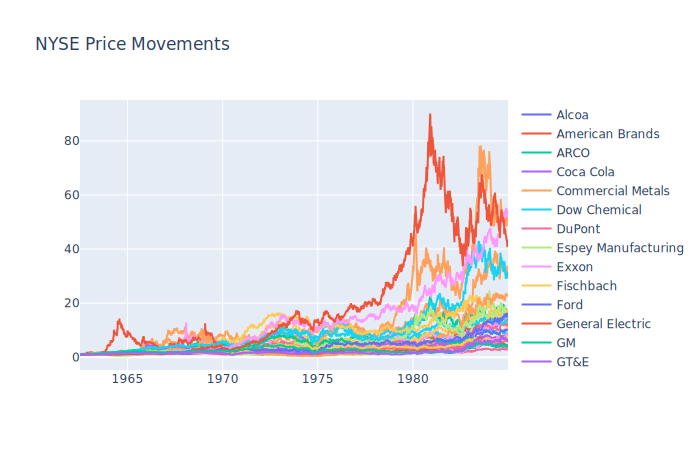

In [5]:
fig_nyse = go.Figure({'data':[{'x': nyse.index, 'y': nyse[col], 'name': col} for col in nyse.columns[1:-1]],
                      'layout':{'title':'NYSE Price Movements'}})
fig_nyse.show()

Generally, most assets in this dataset increased by a significant amount. The notable outperforming companies are American Brands and Commercial Metals, and the least performing stock, DuPont, still ended with 2.9 times returns as no stocks in this list decreased in value.

### DJIA: 2001-2003

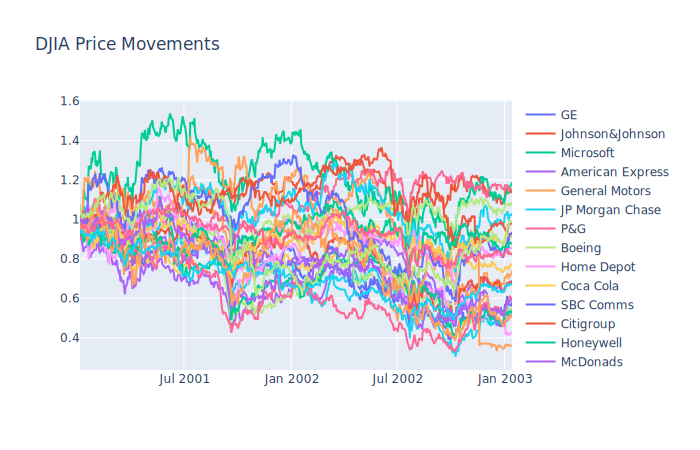

In [6]:
fig_djia = go.Figure({'data':[{'x': djia.index,'y': djia[col],'name': col} for col in djia.columns[1:-1]],
                      'layout':{'title':'DJIA Price Movements'}})
fig_djia.show()

DJIA from 2001 to 2003 provides strikingly different patterns compared to the previous NYSE data. Only 5 companies increased in price as most declined at a steady rate.

### TSE: 1994-1998

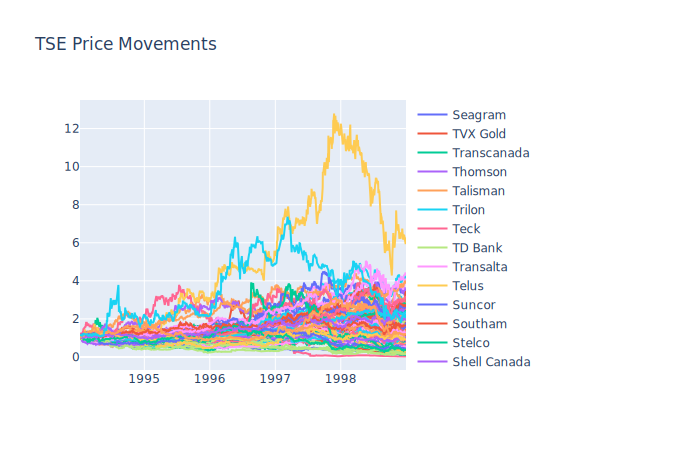

In [7]:
fig_tse = go.Figure({'data':[{'x': tse.index,'y': tse[col],'name': col} for col in tse.columns[1:-1]],
                     'layout':{'title':'TSE Price Movements'}})
fig_tse.show()

The Toronto Stock Exchange data includes a collection that may be unfamiliar to most researchers. It is a unique universe with half of the stocks decreasing in value. With a combination of both overperforming and underperforming stocks, selection strategies need to identify the ups and downs to have profitable returns.

### SP500: 1998-2003

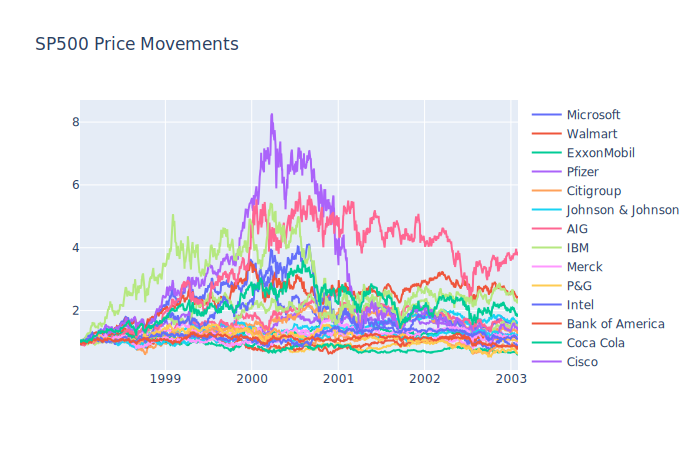

In [8]:
fig_sp500 = go.Figure({'data':[{'x': sp500.index,'y': sp500[col],'name': col} for col in sp500.columns[1:-1]],
                       'layout':{'title':'SP500 Price Movements'}})
fig_sp500.show()

This dataset also includes the bear and bull run during turbulent times. It is longer than the DJIA data by 3 years and includes many companies that are familiar to us. SP500 during this time goes through the bear market in 2000, and in the long run, all but 5 companies increase in value.

### MSCI: 1993-2020

Different from traditional assets, the world indexes capture much more than just the price changes of individual companies. With an overarching representation of the countries' market states, these market indexes will present a different idea for applications of online portfolio selection strategies.

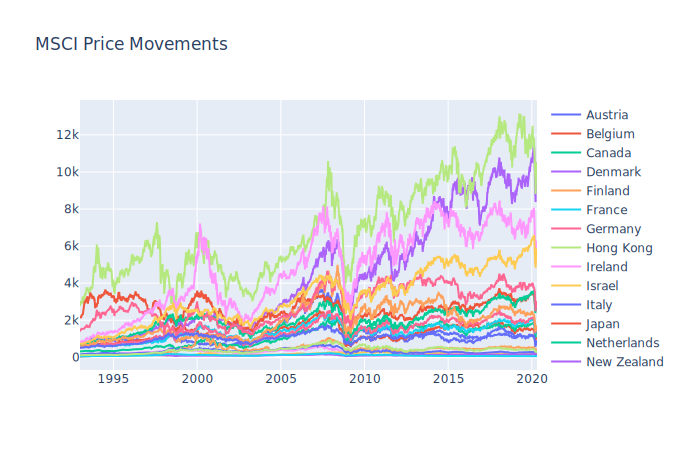

In [9]:
fig_msci = go.Figure({'data':[{'x': msci.index,'y': msci[col],'name': col} for col in msci.columns[1:-1]],
                      'layout':{'title':'MSCI Price Movements'}})
fig_msci.show()

Unlike other datasets, this is not normalized as the ratio to the starting price. Therefore, we will make some adjustments to account for the difference and get a better understanding.

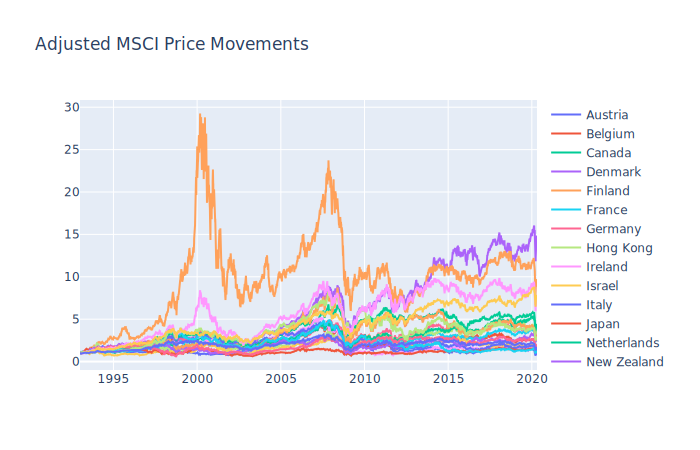

In [10]:
adjusted_msci = msci/msci.iloc[0]
fig_adjusted_msci = go.Figure({'data':[{'x': adjusted_msci.index,'y': adjusted_msci[col],'name': col} for col in adjusted_msci.columns[1:-1]],
                               'layout':{'title':'Adjusted MSCI Price Movements'}})
fig_adjusted_msci.show()

Finland is not the first country to come in mind with metrics like these, but the rise and fall of Finland around the 2000s puts every other country aside. Most countries show movements that are strongly correlated with each other.

### US Equity: 2011-2020

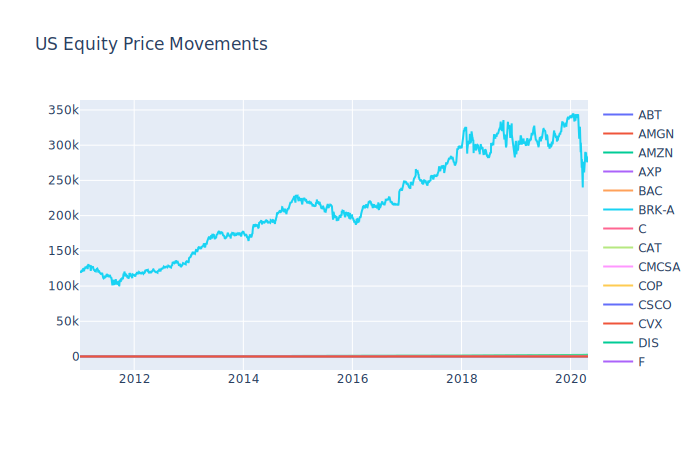

In [11]:
fig_us_equity = go.Figure({'data':[{'x': us_equity.index,'y': us_equity[col],'name': col} for col in us_equity.columns[1:-1]],
                           'layout':{'title':'US Equity Price Movements'}})
fig_us_equity.show()

US Equity data will also be adjusted to account for the relative price difference.

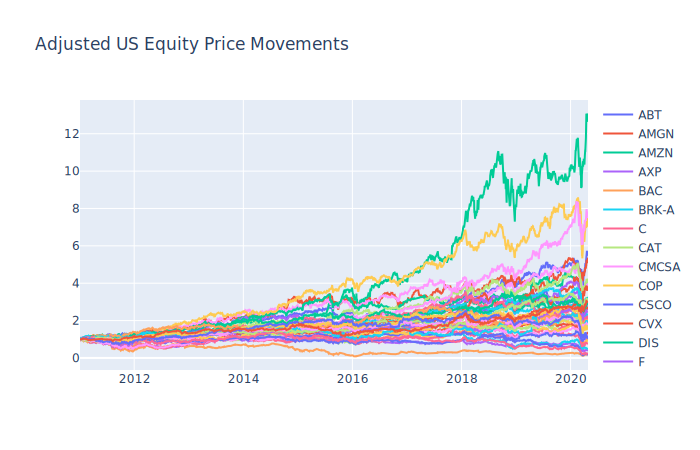

In [12]:
adjusted_us_equity = us_equity/us_equity.iloc[0]
fig_adjusted_us_equity = go.Figure({'data':[{'x': adjusted_us_equity.index,'y': adjusted_us_equity[col],'name': col} for col in adjusted_us_equity.columns[1:-1]],
                                    'layout':{'title':'Adjusted US Equity Price Movements'}})
fig_adjusted_us_equity.show()

Amazon has been the clear winner for the past 10 years with Microsoft and Home Depot being a close second. One key note for this data will be to see how our strategies fared during the downturn caused by the coronavirus.

---

## Benchmarks

Below are applications to benchmarks on each dataset. A lot of the plots here will be referred to in future posts.

In [1]:
from mlfinlab.online_portfolio_selection.benchmarks import *

### NYSE: 1962-1984

In [6]:
nyse_bah = BAH()
nyse_bah.allocate(nyse)
nyse_beststock = BestStock()
nyse_beststock.allocate(nyse)
nyse_crp = CRP()
nyse_crp.allocate(nyse)
nyse_bcrp = BCRP()
nyse_bcrp.allocate(nyse)

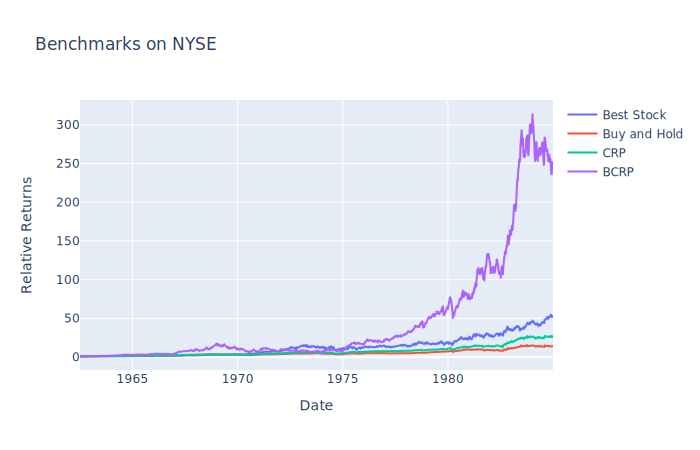

In [11]:
fig = go.Figure()
idx = nyse_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=nyse_beststock.portfolio_return['Returns'], name="Best Stock"))
fig.add_trace(go.Scatter(x=idx, y=nyse_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=nyse_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=nyse_bcrp.portfolio_return['Returns'], name="BCRP"))
fig.update_layout(title='Benchmarks on NYSE', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

### DJIA: 2001-2003

In [12]:
djia_bah = BAH()
djia_bah.allocate(djia)
djia_beststock = BestStock()
djia_beststock.allocate(djia)
djia_crp = CRP()
djia_crp.allocate(djia)
djia_bcrp = BCRP()
djia_bcrp.allocate(djia)

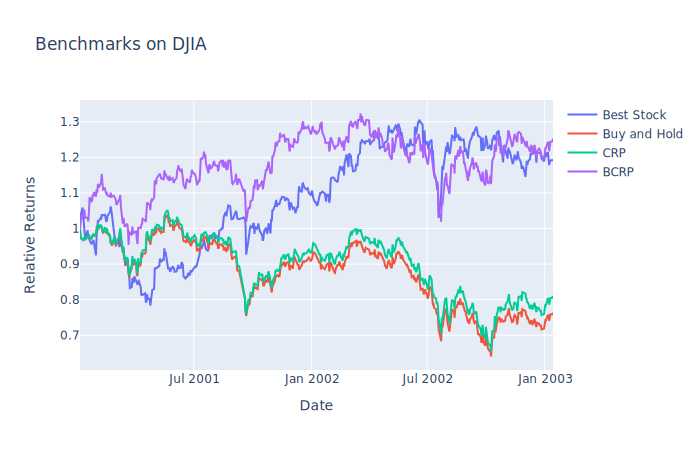

In [13]:
fig = go.Figure()
idx = djia_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=djia_beststock.portfolio_return['Returns'], name="Best Stock"))
fig.add_trace(go.Scatter(x=idx, y=djia_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=djia_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=djia_bcrp.portfolio_return['Returns'], name="BCRP"))
fig.update_layout(title='Benchmarks on DJIA', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

### TSE: 1994-1998

In [14]:
tse_bah = BAH()
tse_bah.allocate(tse)
tse_beststock = BestStock()
tse_beststock.allocate(tse)
tse_crp = CRP()
tse_crp.allocate(tse)
tse_bcrp = BCRP()
tse_bcrp.allocate(tse)

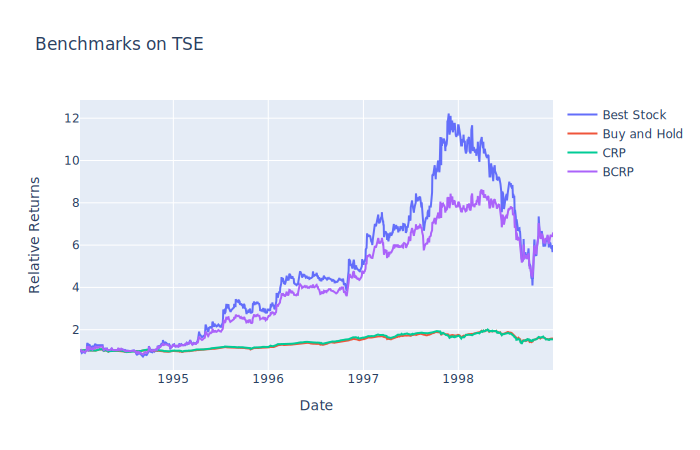

In [15]:
fig = go.Figure()
idx = tse_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=tse_beststock.portfolio_return['Returns'], name="Best Stock"))
fig.add_trace(go.Scatter(x=idx, y=tse_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=tse_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=tse_bcrp.portfolio_return['Returns'], name="BCRP"))
fig.update_layout(title='Benchmarks on TSE', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

### SP500: 1998-2003

In [16]:
sp500_bah = BAH()
sp500_bah.allocate(sp500)
sp500_beststock = BestStock()
sp500_beststock.allocate(sp500)
sp500_crp = CRP()
sp500_crp.allocate(sp500)
sp500_bcrp = BCRP()
sp500_bcrp.allocate(sp500)

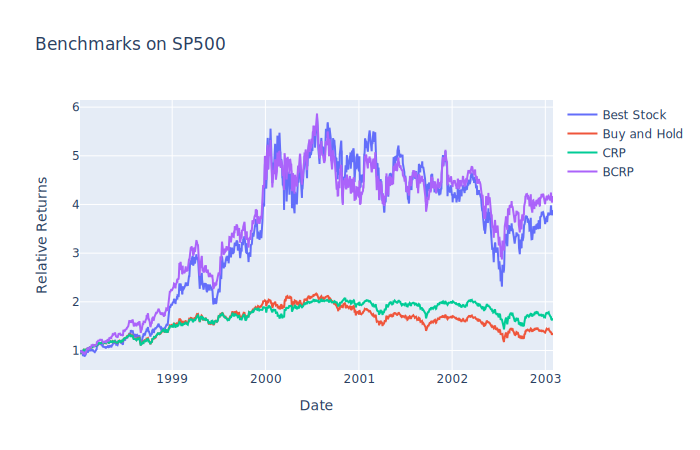

In [17]:
fig = go.Figure()
idx = sp500_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=sp500_beststock.portfolio_return['Returns'], name="Best Stock"))
fig.add_trace(go.Scatter(x=idx, y=sp500_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=sp500_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=sp500_bcrp.portfolio_return['Returns'], name="BCRP"))
fig.update_layout(title='Benchmarks on SP500', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

### MSCI: 1993-2020

In [18]:
msci_bah = BAH()
msci_bah.allocate(msci)
msci_beststock = BestStock()
msci_beststock.allocate(msci)
msci_crp = CRP()
msci_crp.allocate(msci)
msci_bcrp = BCRP()
msci_bcrp.allocate(msci)

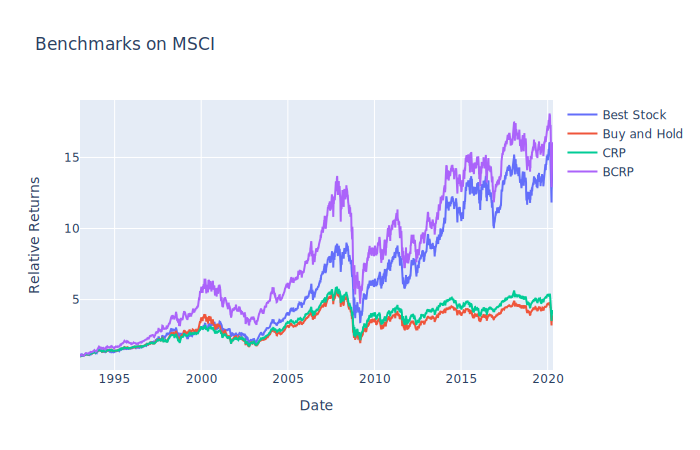

In [19]:
fig = go.Figure()
idx = msci_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=msci_beststock.portfolio_return['Returns'], name="Best Stock"))
fig.add_trace(go.Scatter(x=idx, y=msci_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=msci_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=msci_bcrp.portfolio_return['Returns'], name="BCRP"))
fig.update_layout(title='Benchmarks on MSCI', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

### US Equity: 2011-2020

In [20]:
us_equity_bah = BAH()
us_equity_bah.allocate(us_equity)
us_equity_beststock = BestStock()
us_equity_beststock.allocate(us_equity)
us_equity_crp = CRP()
us_equity_crp.allocate(us_equity)
us_equity_bcrp = BCRP()
us_equity_bcrp.allocate(us_equity)

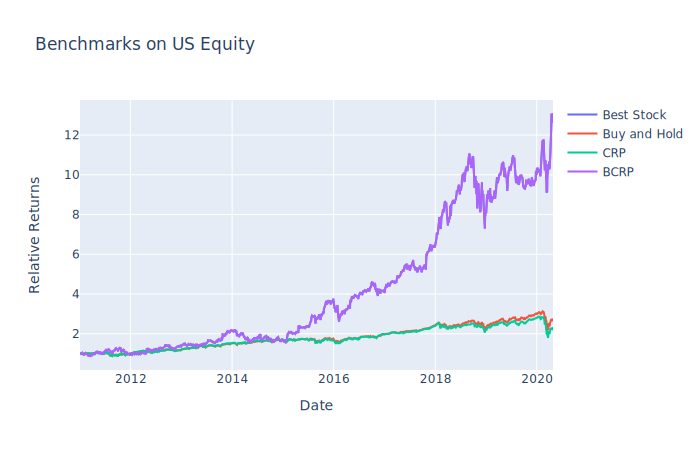

In [21]:
fig = go.Figure()
idx = us_equity_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=us_equity_beststock.portfolio_return['Returns'], name="Best Stock"))
fig.add_trace(go.Scatter(x=idx, y=us_equity_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=us_equity_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=us_equity_bcrp.portfolio_return['Returns'], name="BCRP"))
fig.update_layout(title='Benchmarks on US Equity', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

- Reference: [Online Portfolio Selection](https://books.google.com/books/about/Online_Portfolio_Selection.html?id=R2fdCgAAQBAJ) by Dr. Bin Li and Dr. Steven Hoi